# Intro 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from scipy import stats

import xarray as xa

from scipy.stats import t

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import methods

In [2]:
all0205 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200207-200505.nc", engine='netcdf4')
all0508 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200506-200804.nc", engine='netcdf4')
all0811 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200805-201103.nc", engine='netcdf4')
all1114 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201104-201402.nc", engine='netcdf4')
all1417 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201403-201701.nc", engine='netcdf4')
all1821 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201702-201912.nc", engine='netcdf4')
all2123 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202001-202211.nc", engine='netcdf4')
all2223 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202212-202302.nc", engine='netcdf4')

In [3]:
var = "toa_lw"
alllw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],], 
               dim='time')

In [4]:
var = "toa_sw"
allsw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],], 
               dim='time')

In [5]:
itcz = slice(-0.5, 20.5) #slice(5,15)
trop = slice(-30,30)
wp = slice(120,160)
cp = slice(160,200)
ep = slice(210,260)
ocean = slice(110,270)
ragutime = slice('2002-07-01T00:00:00.000000000','2020-12-15T00:00:00.000000000')
enso16 = slice('2015-06-15T00:00:00.000000000','2016-06-15T00:00:00.000000000')
enso10 = slice('2009-06-15T00:00:00.000000000','2010-06-15T00:00:00.000000000')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [6]:
sst = xa.open_dataset("../daa/sst_mon_mean.nc", engine='netcdf4')
sst_trop = sst.sst.sel(time=ragutime, lon=trop ).mean(['lat', 'lon'])
sst_itcz = sst.sst.sel(time=ragutime, lat=slice(20.5,-0.5), lon=itcz).mean(['lat', 'lon'])
sst_wp = sst.sst.sel(time=ragutime, lat=slice(20.5,-0.5), lon=wp ).mean(['lat', 'lon'])
sst_ep = sst.sst.sel(time=ragutime, lat=slice(20.5,-0.5), lon=ep ).mean(['lat', 'lon'])


In [7]:
#5
#Gistemp GMST anomalies
gmst1850 = pd.read_csv("../daa/GLB.Ts+dSST.csv", skiprows=[0])

gmst = gmst1850.loc[ gmst1850['Year'] >= 2002 ]
gmst = gmst.loc[ gmst['Year'] < 2021 ]
lista_gmst = gmst[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].values.flatten().tolist()
#lista_gmst, len(lista_gmst)
lista_gmst[6:]
#NOT the same as meaqning across all the values, which gives:0.7340974 , 0.23327379, 0.95729756, 0.8614268 , 0.7519227... 
gmst_anom_raghu = np.array(lista_gmst[6:], dtype=np.float16)
gmst_anom_raghu.shape

(222,)

In [8]:
mean0220 = np.mean(gmst_anom_raghu)
corregido = gmst_anom_raghu - mean0220

In [9]:
RclrLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_clr_mon.mean(["lon"])
RovcLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_cldtyp_mon.mean(["lon"])
lwK_trop = (RclrLW_trop - RovcLW_trop)/100

RclrSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_trop = (RclrSW_trop - RovcSW_trop)/100

K_trop = lwK_trop + swK_trop

In [10]:
#2
area_trop = alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).mean("lon")
cc_trop_anom = area_trop.groupby('time.month')- area_trop.groupby('time.month').mean('time')

In [24]:
#3
lwR_trop = lwK_trop.mean("time")*cc_trop_anom
swR_trop = swK_trop.mean("time")*cc_trop_anom

In [25]:
#4
lwR_trop_mean = lwR_trop.mean(["lat"]) #.weighted(weights=weights)
swR_trop_mean = swR_trop.mean(["lat"]) #.weighted(weights=weights)

In [26]:
x = np.array([gmst_anom_raghu, sst_itcz])

In [11]:
optdim = [0,1,2,3,4,5]
pressdim = [0,1,2,3,4,5,6]

In [15]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [16]:

feed = np.zeros([len(pressdim), len(optdim)])
feed_st = np.zeros([len(pressdim), len(optdim)])

x = corregido.astype(np.float32)
#x = sm.add_constant(x)

for od in optdim:
    for p in pressdim:
        bints = lwR_trop_mean.sel(press=p, opt=od).data
        regress = sm.OLS(endog=bints, exog=x).fit()
        feed[p, od] = regress.params[0]
        feed_st[p, od] = regress.bse[0]

In [17]:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.061
Method:                 Least Squares   F-statistic:                              15.42
Date:                Mon, 06 Jan 2025   Prob (F-statistic):                    0.000115
Time:                        17:11:32   Log-Likelihood:                          379.11
No. Observations:                 222   AIC:                                     -756.2
Df Residuals:                     221   BIC:                                     -752.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0610      0.016      3.926      0.000       0.030       0.092
==============================================================================
Omnibus:                        0.878   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.574
Skew:                           0.065   Prob(JB):                        0.751
Kurtosis:                       3.212   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
regress.params, regress.bse

(array([0.06102622], dtype=float32), array([0.01554277], dtype=float32))

In [19]:
feed_r = xa.DataArray(
            feed,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

feed_stderr = xa.DataArray(
            feed_st,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )


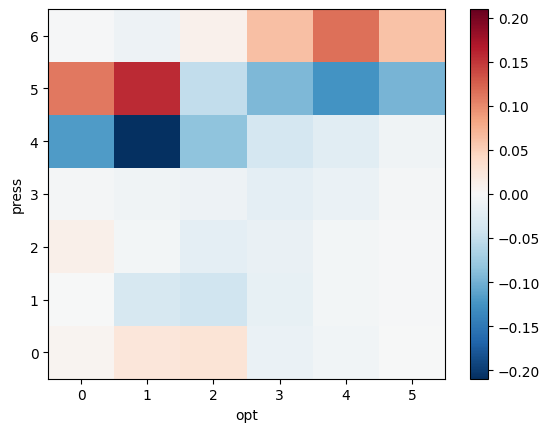

In [20]:
feed_r.plot()

In [12]:
sst_itcz_corregido = sst_itcz - sst_itcz.mean()
sst_itcz_corregido.mean()

<xarray.DataArray 'sst' ()>
array(-7.3029116e-07, dtype=float32)

In [13]:
def amt(area, k, gmst, high_clouds=True):
        if high_clouds:
            hc = [4, 5, 6]
        else:
            hc = []
        cc_anom = methods.anomaly(area)
        cTot = area.sum(["press", "opt"])
        cTot_anom = cc_anom.sum(["press", "opt"])
        area = area.sel(press=hc)
        k = k.sel(press=hc)

        K_0_hc = (((area.sel(press=hc) / cTot)) * k.sel(press=hc)).sum(
            ["opt", "press"]
        )
        Ramt_anom = K_0_hc * cTot_anom
        y = Ramt_anom.mean("lat").data
        # feed_amount = stats.linregress(self.gmst, Ramt_anom.mean("lat"))
        feed_amount = sm.OLS(endog=y, exog=gmst).fit()
        return (
            feed_amount.params[0],
            1.7 * feed_amount.bse[0],
        )  # feed_amount.slope, self.tcrit * feed_amount.stderr

In [15]:
coso = amt(area_trop, K_trop, X)
coso

(-0.02009577, 0.023793567996472118)

In [14]:
X = np.column_stack((corregido.astype(np.float32), sst_itcz_corregido.data.astype(np.float32)))

In [16]:
hclw = methods.Feedbacks(area_trop.sel(press=[4,5,6]), lwK_trop.sel(press=[4,5,6]), X)
hcsw = methods.Feedbacks(area_trop.sel(press=[4,5,6]), swK_trop.sel(press=[4,5,6]), X)
hcnet = methods.Feedbacks(area_trop.sel(press=[4,5,6]), K_trop.sel(press=[4,5,6]), X)

In [17]:
methods.summary(hclw, hcsw, hcnet,  (-0.39,0.3), (0.48,0.3), (0.09,0.12))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,-0.3900,0.3000,0.4800,0.3000,0.0900,0.1200
Amount,-0.3413,0.3123,0.2905,0.3035,-0.0508,0.0657
Altitude,0.1301,0.0296,-0.0202,0.0065,0.1100,0.0243
Optical Depth,-0.1304,0.1314,0.1962,0.2108,0.0658,0.0920
Residual,-0.0251,0.0274,-0.0163,0.0094,-0.0415,0.0200


In [23]:
feed = np.zeros([len(pressdim), len(optdim)])
feed_st = np.zeros([len(pressdim), len(optdim)])

#x = sm.add_constant(x)

for od in optdim:
    for p in pressdim:
        bints = lwR_trop_mean.sel(press=p, opt=od).data
        regress = sm.OLS(endog=bints, exog=X).fit()
        feed[p, od] = regress.params[0]
        feed_st[p, od] = regress.bse[0]

In [24]:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              7.681
Date:                Mon, 06 Jan 2025   Prob (F-statistic):                    0.000596
Time:                        17:11:32   Log-Likelihood:                          379.12
No. Observations:                 222   AIC:                                     -754.2
Df Residuals:                     220   BIC:                                     -747.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0614      0.016      3.862      0.000       0.030       0.093
x2            -0.0003      0.002     -0.119      0.905      -0.005       0.004
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.570
Skew:                           0.064   Prob(JB):                        0.752
Kurtosis:                       3.213   Cond. No.                         6.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
feed_r = xa.DataArray(
            feed,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

feed_stderr = xa.DataArray(
            feed_st,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )


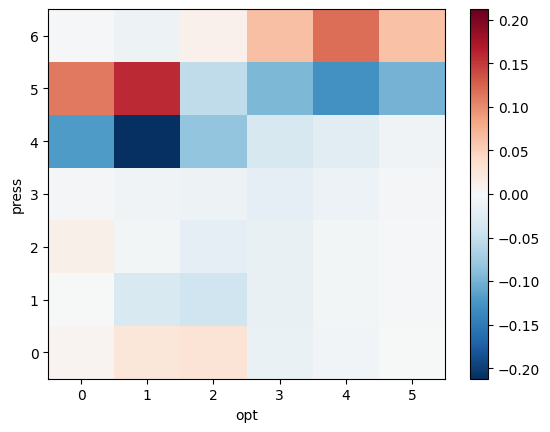

In [26]:
feed_r.plot()

In [27]:
feed_st

array([[0.00115918, 0.00515451, 0.00984852, 0.00744316, 0.00159241,
        0.0003811 ],
       [0.00177374, 0.00840028, 0.01156283, 0.00553332, 0.00234211,
        0.00061902],
       [0.00324401, 0.00646163, 0.00837015, 0.00630863, 0.00358577,
        0.00082123],
       [0.00396052, 0.006643  , 0.01030639, 0.01024029, 0.00684467,
        0.00175526],
       [0.01856402, 0.01820783, 0.02322865, 0.01945671, 0.0110626 ,
        0.00217305],
       [0.02566427, 0.04303598, 0.0468582 , 0.03365713, 0.02030593,
        0.01232168],
       [0.0031957 , 0.00598996, 0.00528964, 0.01217672, 0.01785726,
        0.01590222]])

# Aerosols

In [18]:
aod = xa.open_dataset("../daa/CERES_SYN1deg-Month_Terra-Aqua-MODIS_Ed4.1_Subset_200207-202407.nc", engine='netcdf4')

In [19]:
aod_trop = aod.ini_aod55_mon.sel(time=ragutime).mean(['lat', 'lon'])

In [20]:
aod_anom_trop = methods.anomaly(aod_trop)

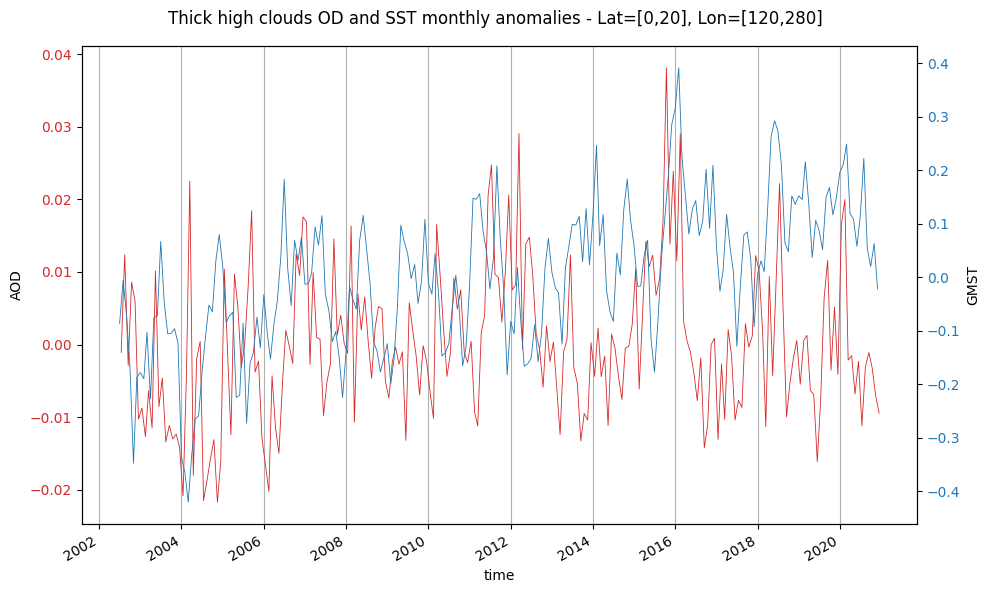

In [31]:

fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:red"
(p1,) = aod_anom_trop.plot(
    linewidth=0.6,
    ax=ax1,
    color=color,
)
ax1.tick_params(
    axis="y",
    labelcolor=color,
)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:blue"
(p2,) = methods.anomaly(sst_trop).plot( #xa.DataArray(data=corregido, coords=[("time", aod_trop.time.data)])
    linewidth=0.6, ax=ax2, color=color
)  # ax2.plot(t, data2, color=color)
ax2.tick_params(
    axis="y",
    labelcolor=color,
)

plt.suptitle(
    "Thick high clouds OD and SST monthly anomalies - Lat=[0,20], Lon=[120,280]"
)
ax1.set_ylabel("AOD")
ax2.set_ylabel("GMST")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.xaxis.set_major_locator(mdates.YearLocator(base=1))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.grid(visible=True, axis="x")

plt.show()

In [32]:
xa.corr(aod_anom_trop, methods.anomaly(sst_trop)) #xa.DataArray(data=corregido, coords=[("time", aod_trop.time.data)])
#SIMILAR correlation coef GMST and trop sst anom ~0.1

/home/eepvrj/anaconda3/envs/sense2023/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/eepvrj/anaconda3/envs/sense2023/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<xarray.DataArray ()>
array(nan)

In [21]:
aod_itcz = aod.ini_aod55_mon.sel(lat=itcz, time=ragutime).mean(['lat', 'lon'])

In [27]:
Xaod = np.column_stack((corregido.astype(np.float32), aod_anom_trop.astype(np.float32)))

In [29]:
hclw_aod = methods.Feedbacks(area_trop.sel(press=[4,5,6]), lwK_trop.sel(press=[4,5,6]), Xaod)
hcsw_aod = methods.Feedbacks(area_trop.sel(press=[4,5,6]), swK_trop.sel(press=[4,5,6]), Xaod)
hcnet_aod = methods.Feedbacks(area_trop.sel(press=[4,5,6]), K_trop.sel(press=[4,5,6]), Xaod)

In [30]:
methods.summary(hclw_aod, hcsw_aod, hcnet_aod,  (-0.39,0.3), (0.48,0.3), (0.09,0.12))

,lw_mean,lw_ci,sw_mean,sw_ci,net_mean,net_ci
Total,-0.3900,0.3000,0.4800,0.3000,0.0900,0.1200
Amount,-0.2899,0.3093,0.2468,0.3012,-0.0430,0.0652
Altitude,0.1344,0.0293,-0.0214,0.0064,0.1130,0.0241
Optical Depth,-0.1850,0.1253,0.2740,0.2028,0.0890,0.0902
Residual,-0.0229,0.0273,-0.0156,0.0093,-0.0385,0.0198


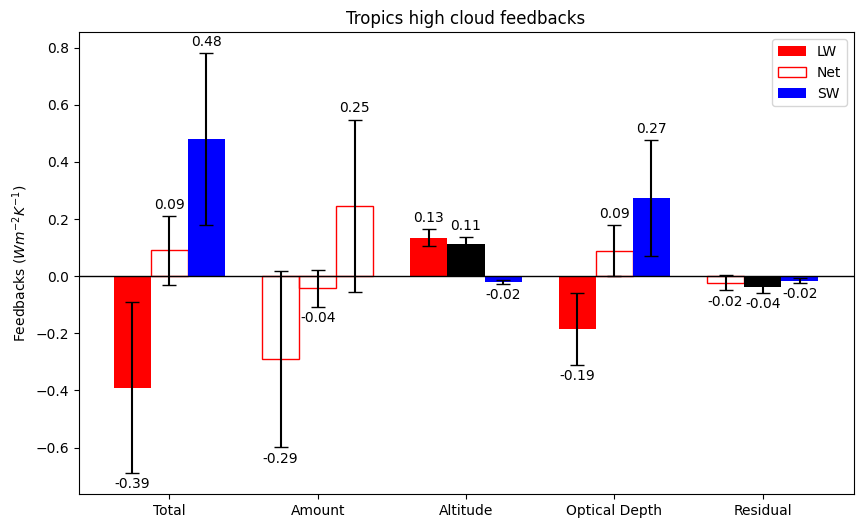

In [32]:
methods.plot(hclw_aod, hcsw_aod, hcnet_aod,  area="Tropics", totallw=(-0.39,0.3), totalsw=(0.48,0.3), totalnet=(0.09,0.12))

In [36]:
feed = np.zeros([len(pressdim), len(optdim)])
feed_st = np.zeros([len(pressdim), len(optdim)])

#x = sm.add_constant(x)

for od in optdim:
    for p in pressdim:
        bints = lwR_trop_mean.sel(press=p, opt=od).data
        regress = sm.OLS(endog=bints, exog=Xaod).fit()
        feed[p, od] = regress.params[0]
        feed_st[p, od] = regress.bse[0]

In [37]:
feed_r = xa.DataArray(
            feed,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

feed_stderr = xa.DataArray(
            feed_st,
            coords={
                "press": pressdim,
                "opt": optdim,
            },
        )

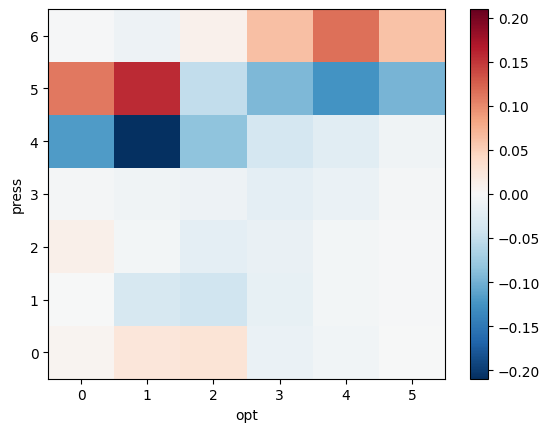

In [38]:
feed_r.plot()

In [39]:
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              7.673
Date:                Mon, 06 Jan 2025   Prob (F-statistic):                    0.000601
Time:                        17:12:27   Log-Likelihood:                          379.11
No. Observations:                 222   AIC:                                     -754.2
Df Residuals:                     220   BIC:                                     -747.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0610      0.016      3.917      0.000       0.030       0.092
x2             0.0001      0.012      0.011      0.992      -0.023       0.024
==============================================================================
Omnibus:                        0.878   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.573
Skew:                           0.065   Prob(JB):                        0.751
Kurtosis:                       3.212   Cond. No.                         1.31
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
feed_st

array([[0.00113726, 0.00504877, 0.00964754, 0.0072918 , 0.00156151,
        0.00037354],
       [0.00173765, 0.00822737, 0.01132586, 0.00541982, 0.00229416,
        0.00060659],
       [0.00317857, 0.00633007, 0.00819767, 0.00617909, 0.00351261,
        0.00080453],
       [0.00387874, 0.00650667, 0.0100957 , 0.01003055, 0.0067056 ,
        0.00171946],
       [0.01818489, 0.01785278, 0.02275793, 0.01906216, 0.01083702,
        0.00212945],
       [0.02514041, 0.04216862, 0.04590228, 0.03297386, 0.01991556,
        0.01210364],
       [0.00313123, 0.00586722, 0.00518087, 0.01193721, 0.01752233,
        0.01557808]])

## itcz

In [ ]:
#2
area_itcz = alllw.cldarea_cldtyp_mon.sel(lat=itcz, lon=ocean_only,time=ragutime).mean("lon")
cc_itcz_anom = area_itcz.groupby('time.month')- area_itcz.groupby('time.month').mean('time')

In [ ]:
hclw_itcz = methods.Feedbacks(area_itcz.sel(press=[4,5,6]), lwK_itcz.sel(press=[4,5,6]), corregido)
hcsw_itcz = methods.Feedbacks(area_itcz.sel(press=[4,5,6]), swK_itcz.sel(press=[4,5,6]), corregido)
hcnet_itcz = methods.Feedbacks(area_itcz.sel(press=[4,5,6]), K_itcz.sel(press=[4,5,6]), corregido)